<a href="https://colab.research.google.com/github/Ndy-S/machine-learning-fundamental/blob/main/Natural%20Language%20Processing%20with%20Sequence%20Models/W4_siamese_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Siamese Networks

## Siamese Networks

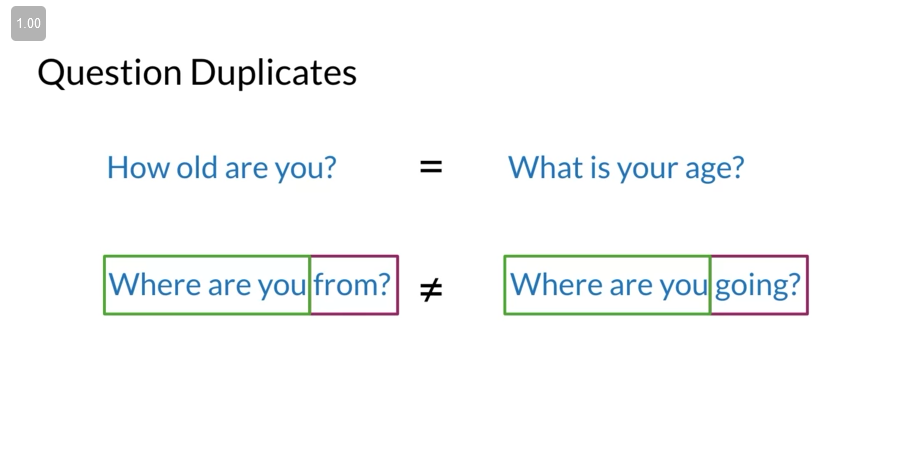

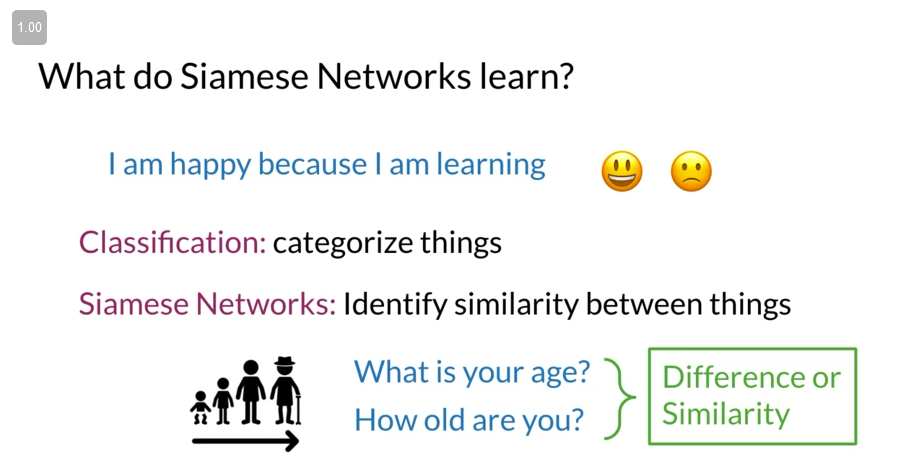

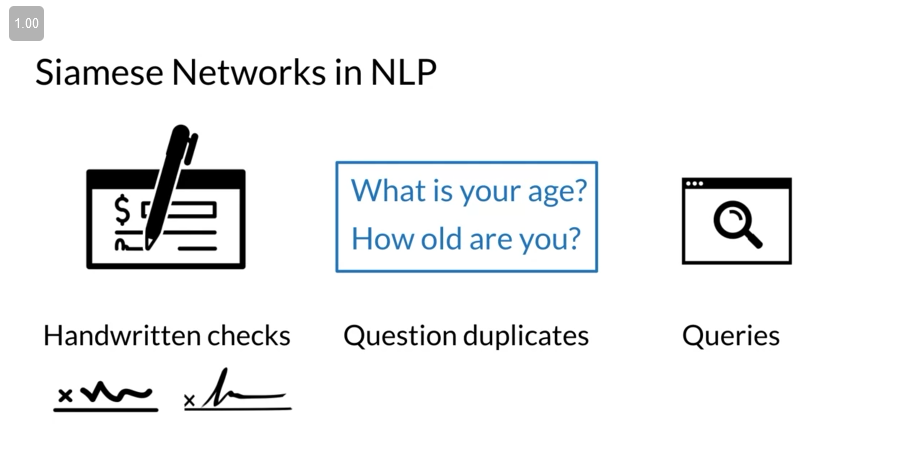

In [ ]:
# SECTION DIVIDER

## Architecture

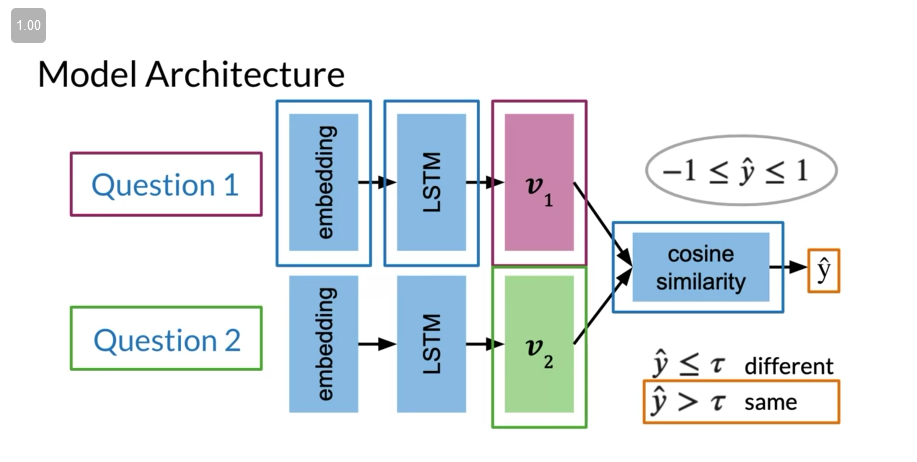

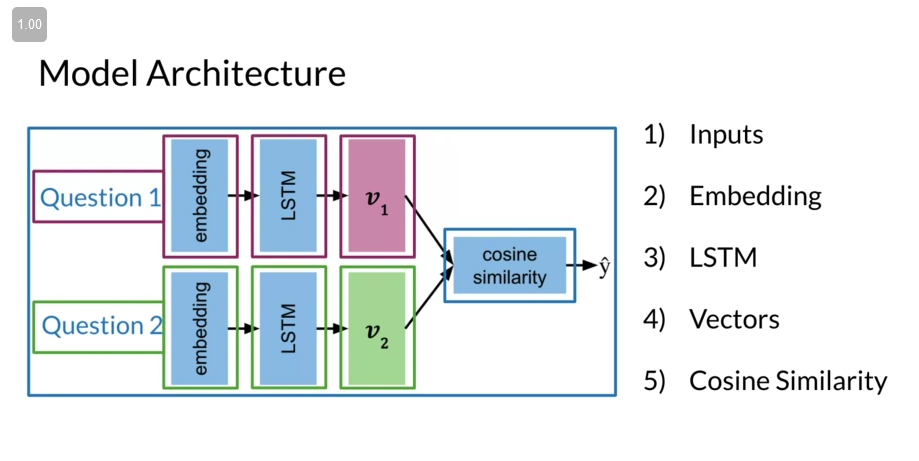

In [ ]:
# SECTION DIVIDER

## Creating a Siamese Model using Trax Code

In [ ]:
from IPython.display import clear_output
!pip install trax
clear_output(wait=False)

In [ ]:
import trax
from trax import layers as tl
import trax.fastmath.numpy as np
import numpy

numpy.random.seed(10)

In [ ]:
# L2 Normalization
def normalize(x):
  return x / np.sqrt(np.sum(x * x, axis=-1, keepdims=True))

tensor = numpy.random.random((2, 5))
print(f'The tensor is of type: {type(tensor)}\nAnd looks like this:\n {tensor}\n')

norm_tensor = normalize(tensor)
print(f'The normalized tensor is of type: {type(norm_tensor)}\nAnd looks like this:\n {norm_tensor}')

The tensor is of type: <class 'numpy.ndarray'>
And looks like this:
 [[0.39252924 0.09346037 0.82110566 0.15115202 0.38411445]
 [0.94426071 0.98762547 0.45630455 0.82612284 0.25137413]]

The normalized tensor is of type: <class 'jaxlib.xla_extension.ArrayImpl'>
And looks like this:
 [[0.39108118 0.09311559 0.8180765  0.1505944  0.3826974 ]
 [0.56220794 0.58802706 0.27168137 0.49186924 0.14966685]]


In [ ]:
# Siamese Model
vocab_size = 500
model_dimension = 128

LSTM = tl.Serial(
    tl.Embedding(vocab_size=vocab_size, d_feature=model_dimension),
    tl.LSTM(model_dimension),
    tl.Mean(axis=1),
    tl.Fn('Normalize', lambda x: normalize(x))
)

Siamese = tl.Parallel(LSTM, LSTM)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def show_layers(model, layer_prefix):
    print(f"Total layers: {len(model.sublayers)}\n")
    for i in range(len(model.sublayers)):
        print('========')
        print(f'{layer_prefix}_{i}: {model.sublayers[i]}\n')

print('Siamese model:')
show_layers(Siamese, 'Parallel.sublayers')

print('Detail of LSTM models:')
show_layers(LSTM, 'Serial.sublayers')

Siamese model:
Total layers: 2

Parallel.sublayers_0: Serial[
  Embedding_500_128
  LSTM_128
  Mean
  Normalize
]

Parallel.sublayers_1: Serial[
  Embedding_500_128
  LSTM_128
  Mean
  Normalize
]

Detail of LSTM models:
Total layers: 4

Serial.sublayers_0: Embedding_500_128

Serial.sublayers_1: LSTM_128

Serial.sublayers_2: Mean

Serial.sublayers_3: Normalize



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# SECTION DIVIDER

## Cost Function

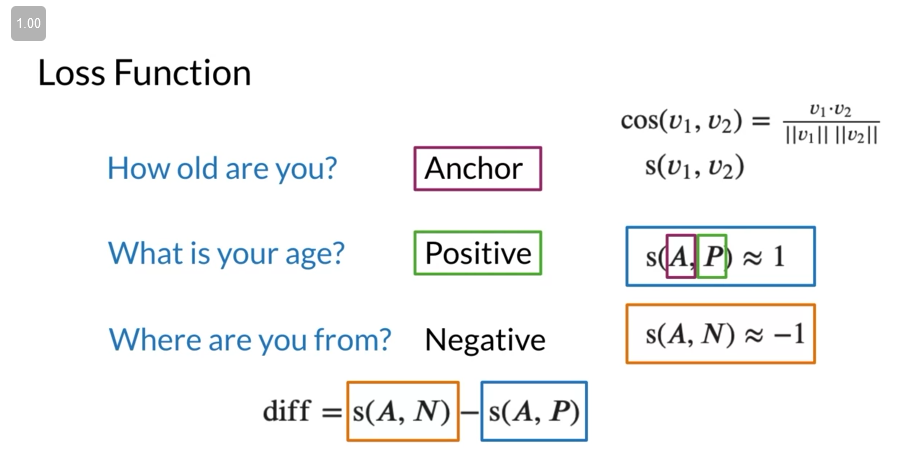

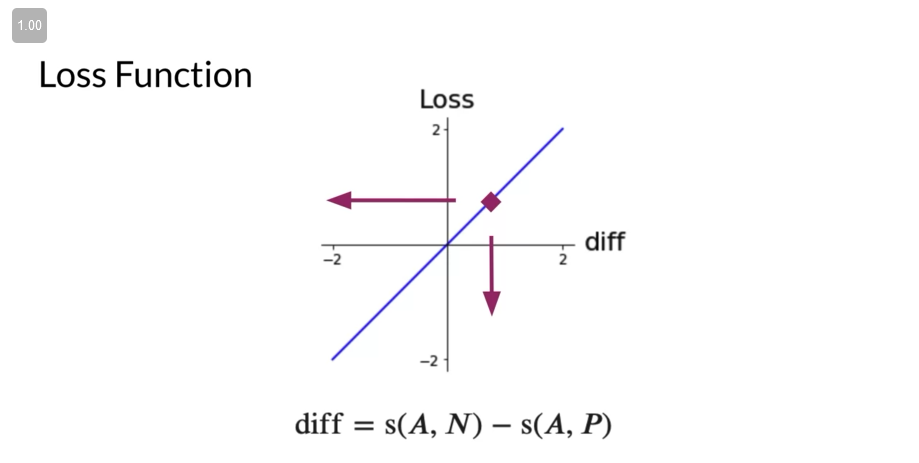

In [ ]:
# SECTION DIVIDER

## Triplets

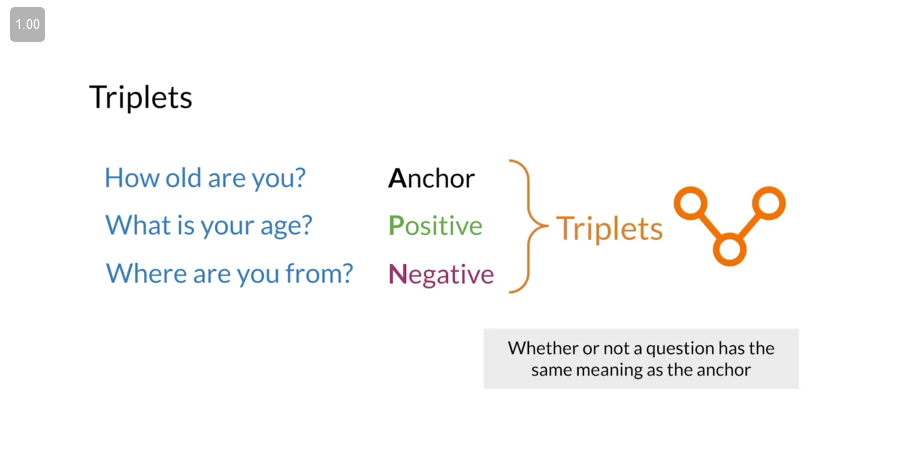

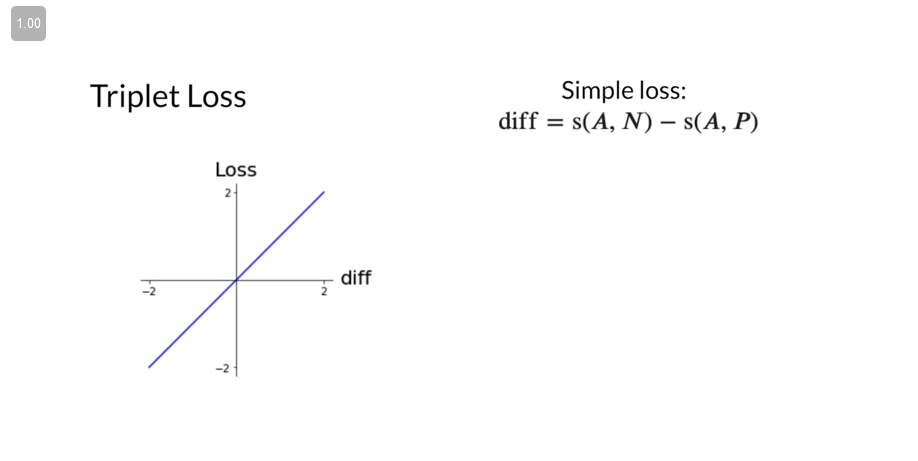

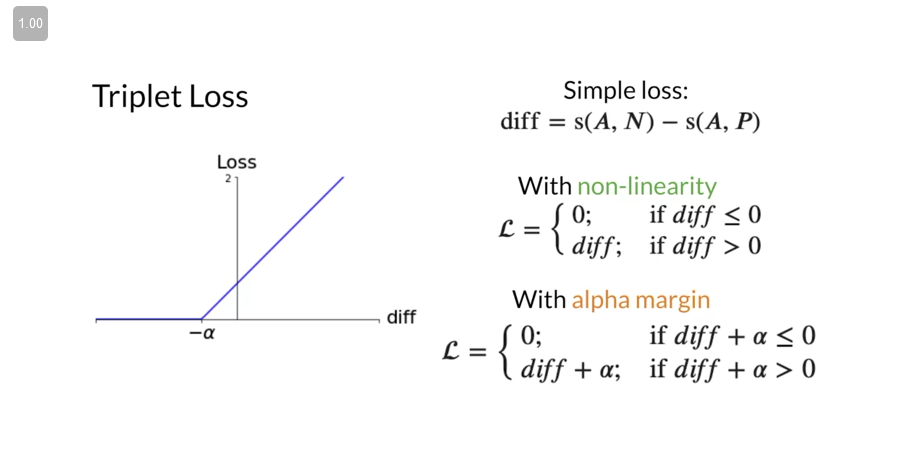

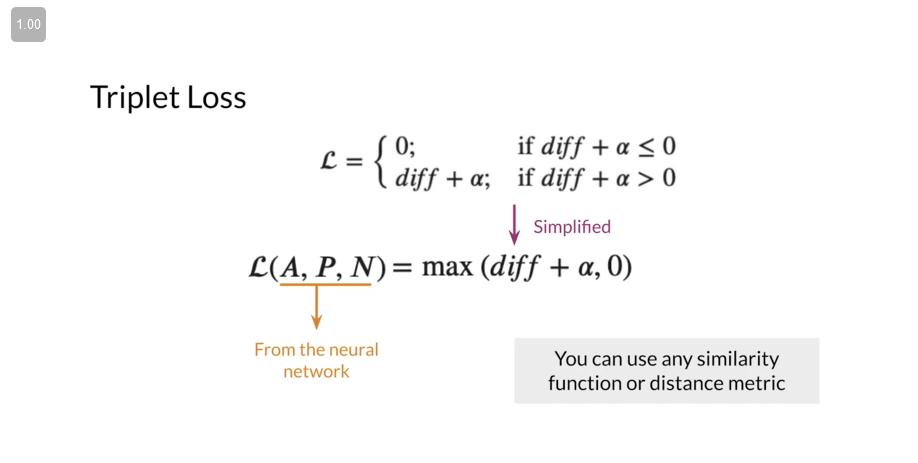

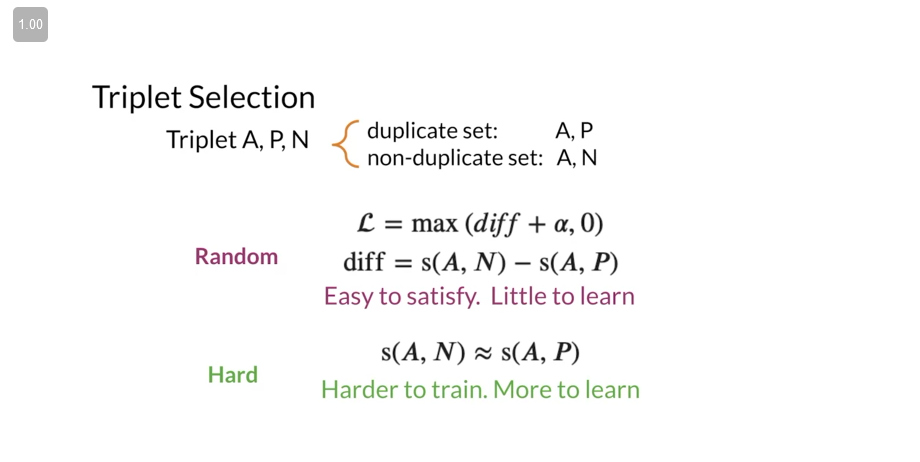

In [ ]:
# SECTION DIVIDER

## Computing The Cost I

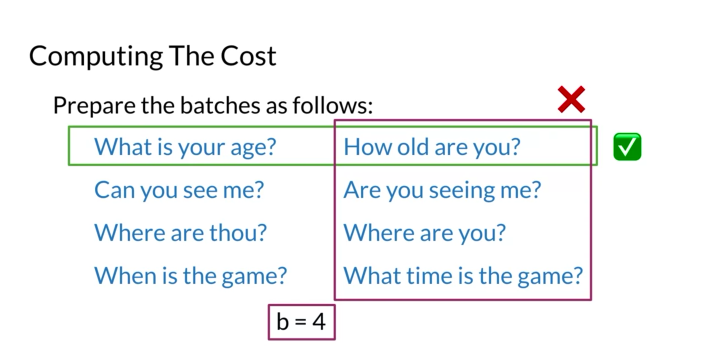

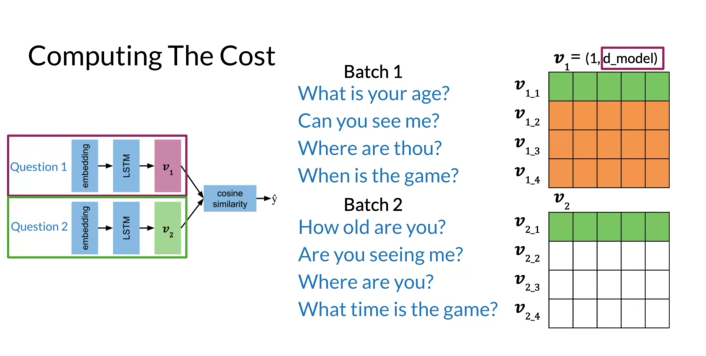

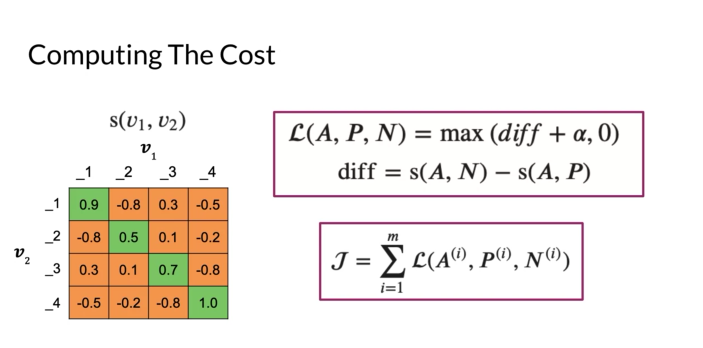

In [ ]:
# SECTION DIVIDER

## Computing The Cost II

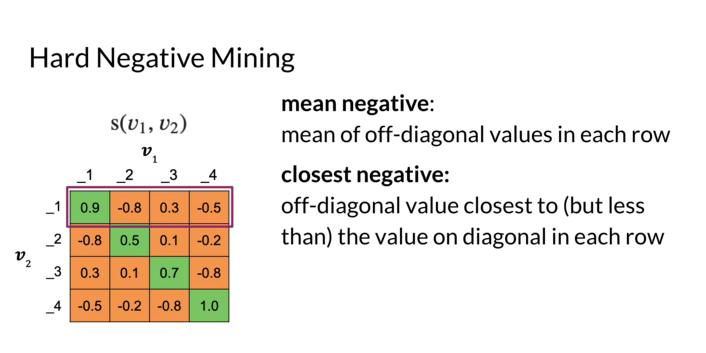

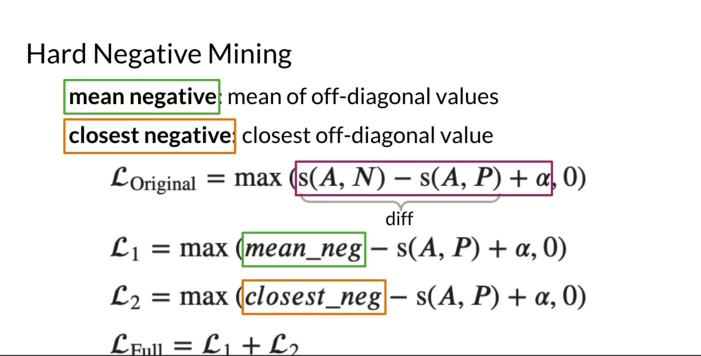

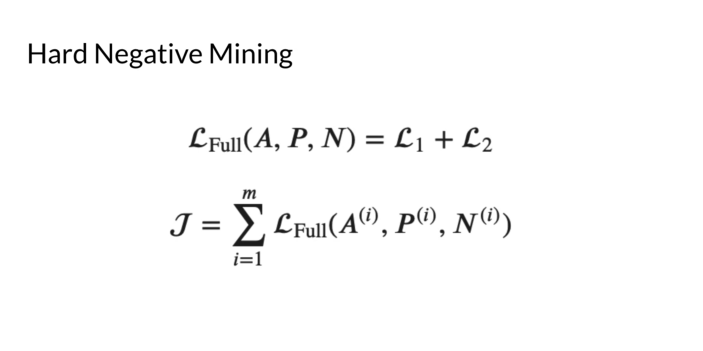

In [ ]:
# SECTION DIVIDER

## Modified Triplet Loss Code

In [ ]:
# SECTION DIVIDER

## One Shot Learning

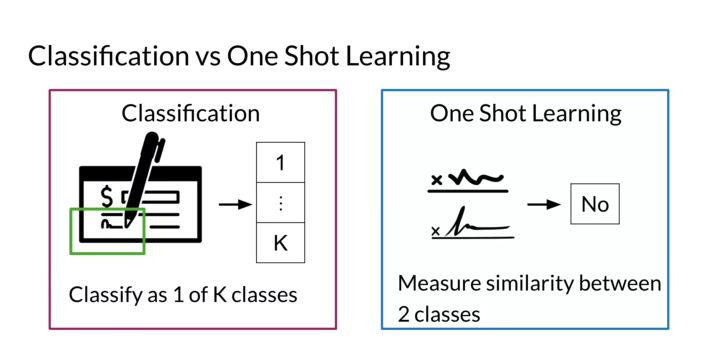

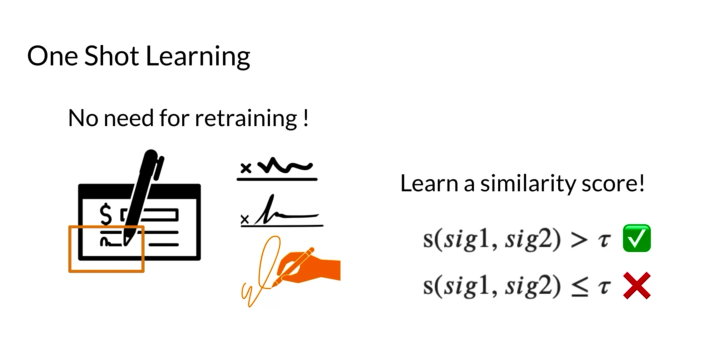

In [ ]:
# SECTION DIVIDER

## Training / Testing

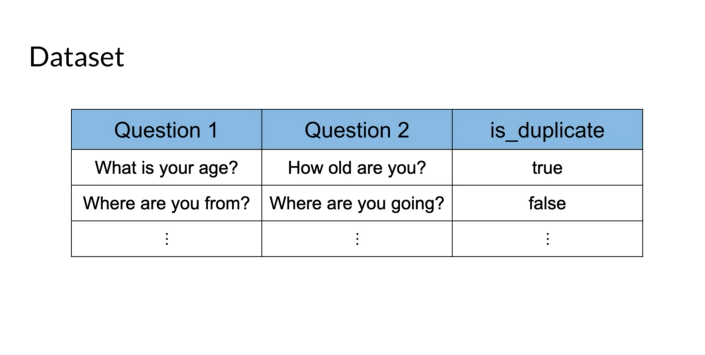

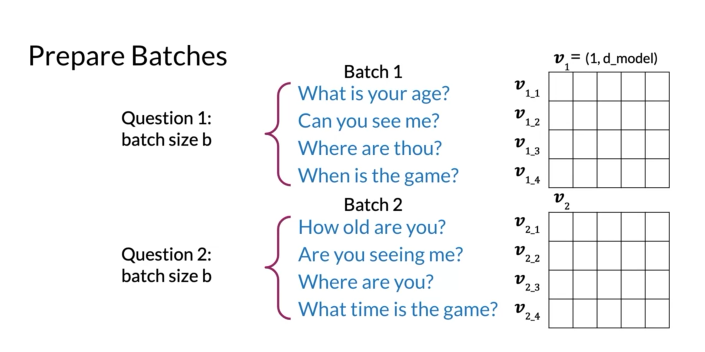

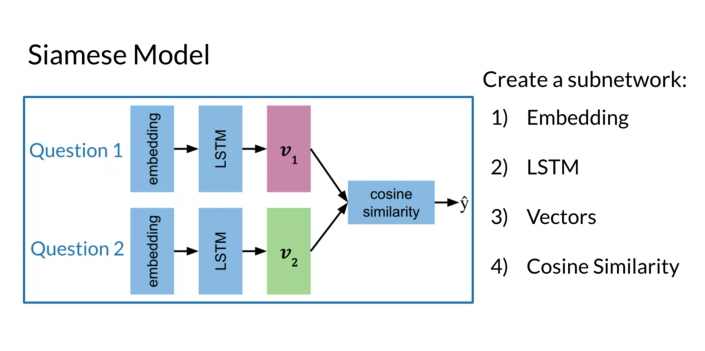

### Testing
1. Convert each input into an array of numbers
2. Feed arrays into your model
3. Compare $v_1, v_2$ using cosine similarity
4. Test against a threshold **𝜏**

In [ ]:
# SECTION DIVIDER

## Evaluate a Siamese Model Code

In [ ]:
# SECTION DIVIDER

## Question Duplicates